In [73]:
import csv
import pandas as pd

df = pd.read_excel("data.xlsx", names=["Name", "Age", "Email","Mother tongue", "Known languages",
                                      "Percentage of Openness","Percentage of Conscientiousness", "Percentage of Extraversion",
                                    "Percentage of Agreeableness", "Percentage of Neuroticism","exp1","exp1-accidents",
                                       "exp2","exp2-accidents","exp3","exp3-accidents","exp4","exp4-accidents","exp5","exp5-accidents",
                                       "exp6","exp6-accidents","exp7","exp7-accidents","exp8","exp8-accidents","exp9","exp9-accidents","exp10"
                                       ,"exp10-accidents"
                                      ], index_col=0)

Lang_Russian = "Russian"
No_lyrics = "No lyrics"
No_music = "noMusic"





df.index.name="Index"
df.head(10)

,Name,Age,Email,Mother tongue,Known languages,Percentage of Openness,Percentage of Conscientiousness,Percentage of Extraversion,Percentage of Agreeableness,Percentage of Neuroticism,...,exp6,exp6-accidents,exp7,exp7-accidents,exp8,exp8-accidents,exp9,exp9-accidents,exp10,exp10-accidents
Index,,,,,,,,,,,,,,,,,,,,,
2018-05-01 00:08:37,NaN,55.0,NaN,French,"English, Spanish",79.0,92.0,79.0,76.0,66.0,...,French,5.0,Russian,7.0,No lyrics,6.0,French,7.0,Russian,5.0
2018-05-01 23:29:09,NaN,20.0,NaN,French,"English, Spanish, French, German",44.0,38.0,85.0,42.0,79.0,...,French,2.0,Russian,4.0,French,1.0,No lyrics,5.0,Russian,4.0
2018-05-02 20:25:57,NaN,22.0,NaN,Spanish,"English, Spanish, French",34.0,79.0,85.0,69.0,24.0,...,No lyrics,3.0,Spanish,6.0,No lyrics,5.0,Spanish,5.0,Russian,5.0
2018-05-02 20:30:16,NaN,24.0,NaN,Persian,English,62.0,85.0,66.0,76.0,50.0,...,Russian,7.0,Persian,4.0,Russian,7.0,No lyrics,3.0,Persian,10.0
2018-05-06 22:00:25,NaN,24.0,NaN,Spanish,"English, Spanish, French, German, Italian",73.0,95.0,79.0,60.0,79.0,...,Spanish,6.0,No lyrics,4.0,Spanish,2.0,Russian,4.0,No lyrics,7.0
2018-05-07 17:13:05,NaN,NaN,NaN,French,"English, French",46.0,73.0,66.0,52.0,85.0,...,No lyrics,6.0,French,4.0,No lyrics,1.0,French,2.0,Russian,3.0
2018-05-07 18:46:11,NaN,20.0,NaN,French,"English, French, Italian",28.0,73.0,73.0,85.0,16.0,...,French,4.0,No lyrics,1.0,Russian,1.0,No lyrics,1.0,French,1.0
2018-05-09 13:37:41,NaN,22.0,NaN,French,"English, French",52.0,24.0,79.0,60.0,16.0,...,French,0.0,Russian,1.0,No lyrics,1.0,Russian,1.0,French,1.0
2018-05-09 18:29:38,NaN,NaN,NaN,French,"English, Spanish, French",66.0,34.0,88.0,85.0,52.0,...,French,5.0,No lyrics,2.0,French,4.0,Russian,2.0,No lyrics,5.0


In [74]:
class User:

    def __init__(self, mother_tongue):
        self.mother_tongue = mother_tongue
        self.familiar_performances = []
        self.foreign_performances = [] 
        self.no_music_performances = [] 
        self.no_lyrics_performances = [] 
        self.all_performances = []

    def add_performance(self, music, performance):
        self.all_performances.append(performance)
        if music == self.mother_tongue:
            self.familiar_performances.append(performance)
        elif music == Lang_Russian:
            self.foreign_performances.append(performance)
        elif music == No_lyrics:
            self.no_lyrics_performances.append(performance)
        elif music == No_music:
             self.no_music_performances.append(performance)
        else:
            print("Exception!!!!!" + "music:"+ str(music))
#             todo Raise Exception!!!
        
    def get_total_accidents(self):
        return sum(self.all_performances)
    
    def get_familiar_avg(self):
        return sum(self.familiar_performances)/3
    
    def get_foreign_avg(self):
        return sum(self.foreign_performances)/3
    
    def get_no_lyrics_avg(self):
        return sum(self.no_lyrics_performances)/3
    
    def get_familiar_proportion(self):
        return self.get_familiar_avg()/(self.get_familiar_avg() + self.get_foreign_avg() + self.get_no_lyrics_avg())
    
    def get_foreign_proportion(self):
        return self.get_foreign_avg()/(self.get_familiar_avg() + self.get_foreign_avg() + self.get_no_lyrics_avg())
    
    def get_no_lyrics_proportion(self):
        return self.get_no_lyrics_avg()/(self.get_familiar_avg() + self.get_foreign_avg() + self.get_no_lyrics_avg())
        
        

In [75]:
users = []
for i in range(0,30):  #todo number of users!!!!
    user = User(df['Mother tongue'][i])
    user.add_performance(df['exp1'][i],df['exp1-accidents'][i])
    user.add_performance(df['exp2'][i],df['exp2-accidents'][i])
    user.add_performance(df['exp3'][i],df['exp3-accidents'][i])
    user.add_performance(df['exp4'][i],df['exp4-accidents'][i])
    user.add_performance(df['exp5'][i],df['exp5-accidents'][i])
    user.add_performance(df['exp6'][i],df['exp6-accidents'][i])
    user.add_performance(df['exp7'][i],df['exp7-accidents'][i])
    user.add_performance(df['exp8'][i],df['exp8-accidents'][i])
    user.add_performance(df['exp9'][i],df['exp9-accidents'][i])
    user.add_performance(df['exp10'][i],df['exp10-accidents'][i])
    
    
    users.append(user)


In [76]:
column_names = ['Timestamp', 'FAM1', 'FAM2','FAM3','FOR1','FOR2','FOR3','NOL1','NOL2','NOL3','NOMUSIC','EXP1','EXP2','EXP3','EXP4'
               ,'EXP5','EXP6','EXP7','EXP8','EXP9','EXP10']

with open("output.csv", "w") as output:
    writer = csv.DictWriter(output, fieldnames=column_names)
    writer.writeheader()
    for i in range(0, len(users)):
        writer.writerow({
            column_names[0]: i,
            column_names[1]: users[i].familiar_performances[0],
            column_names[2]: users[i].familiar_performances[1],
            column_names[3]: users[i].familiar_performances[2],
            column_names[4]: users[i].foreign_performances[0],
            column_names[5]: users[i].foreign_performances[1],
            column_names[6]: users[i].foreign_performances[2],
            column_names[7]: users[i].no_lyrics_performances[0],
            column_names[8]: users[i].no_lyrics_performances[1],
            column_names[9]: users[i].no_lyrics_performances[2],
            column_names[10]: users[i].no_music_performances[0],
            column_names[11]: users[i].all_performances[0],
            column_names[12]: users[i].all_performances[1],
            column_names[13]: users[i].all_performances[2],
            column_names[14]: users[i].all_performances[3],            
            column_names[15]: users[i].all_performances[4],
            column_names[16]: users[i].all_performances[5],            
            column_names[17]: users[i].all_performances[6],
            column_names[18]: users[i].all_performances[7],
            column_names[19]: users[i].all_performances[8],            
            column_names[20]: users[i].all_performances[9],
        })

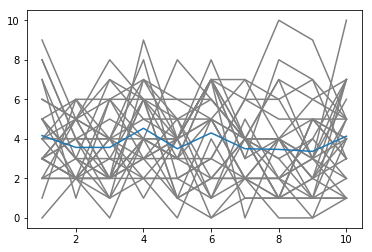

In [77]:
import matplotlib.pyplot as plt
x = [1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10]

performances = []
for i in range(0,len(users)):
    performances.append(users[i].all_performances)
    plt.plot(x,users[i].all_performances, color="gray")
    
    
experiments_mean = [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0]
for i in range(0,len(users)):
    for j in range(0,10):
        experiments_mean[j] += performances[i][j]
    
plt.plot(x,[y/30 for y in experiments_mean])
    
plt.show()

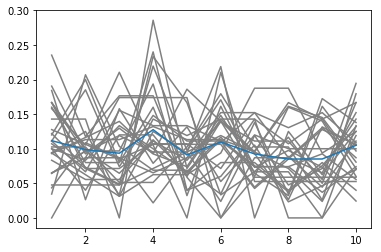

In [78]:
normalized_performances = []
for i in range(0,len(users)):
    normalized_performances.append(users[i].all_performances)
    plt.plot(x,[y/ sum(users[i].all_performances) for y in users[i].all_performances], color="gray")
    
    
experiments_mean = [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0]
for i in range(0,len(users)):
    for j in range(0,10):
        experiments_mean[j] += performances[i][j]/sum(users[i].all_performances)
    
plt.plot(x,[y/30 for y in experiments_mean])
plt.show()

In [79]:
import pandas as pd
import numpy as np

columns = ["Mother tongue", "type", "Number of accidents", "Proportion of accidents - n1", "Proportion of accidents"]
all_familiar_performances = []
all_foreign_performances = []
all_no_lyrics_performances = []
all_no_music_performances = []
all_proportion_familiar_performances = []
all_proportion_foreign_performances = []
all_proportion_no_lyrics_performances = []
all_proportion_no_music_performances = []


users_performances = []
for i in range(0,len(users)):
    new_row = []
    new_row.append(users[i].mother_tongue)    
    new_row.append("FAMILIAR")
    new_row.append(int(np.mean(users[i].familiar_performances)))
    new_row.append((np.mean(users[i].familiar_performances))*3/users[i].get_total_accidents())
    new_row.append(users[i].get_familiar_proportion())
    users_performances.append(new_row)
    new_row2 = []
    new_row2 = new_row[:]
    new_row2[0] = "ALL"
    users_performances.append(new_row2)
    
    new_row = []
    new_row.append(users[i].mother_tongue)    
    new_row.append("FOREIGN")
    new_row.append(int(np.mean(users[i].foreign_performances)))
    new_row.append((np.mean(users[i].foreign_performances))*3/users[i].get_total_accidents())
    new_row.append(users[i].get_foreign_proportion())
    users_performances.append(new_row)
    new_row2 = []
    new_row2 = new_row[:]
    new_row2[0] = "ALL"
    users_performances.append(new_row2)
    
    new_row = []
    new_row.append(users[i].mother_tongue)    
    new_row.append("NO LYRICS")
    new_row.append(int(np.mean(users[i].no_lyrics_performances)))
    new_row.append(np.mean(users[i].no_lyrics_performances )*3/users[i].get_total_accidents())
    new_row.append(users[i].get_no_lyrics_proportion())
    users_performances.append(new_row)
    new_row2 = []
    new_row2 = new_row[:]
    new_row2[0] = "ALL"
    users_performances.append(new_row2)
    
#     new_row = []
#     new_row.append(users[i].mother_tongue)    
#     new_row.append("NO MUSIC")
#     new_row.append(int(np.mean(users[i].no_music_performances)))
#     new_row.append(np.mean([y/ sum(users[i].all_performances) for y in users[i].no_music_performances] ))
#     users_performances.append(new_row)
#     all_no_music_performances.append(np.mean(users[i].no_music_performances))
#     all_proportion_no_music_performances.append(np.mean([y/sum(users[i].all_performances) for y in users[i].no_music_performances]))
    
    
x = np.array(users_performances)

df = pd.DataFrame(data=x[0:,0:],
            columns=columns) 
df["Number of accidents"] = df["Number of accidents"].astype("int")
df["Proportion of accidents"] = df["Proportion of accidents"].astype("float")

df.head(30)

,Mother tongue,type,Number of accidents,Proportion of accidents - n1,Proportion of accidents
0,French,FAMILIAR,4,0.2826086956521739,0.302326
1,ALL,FAMILIAR,4,0.2826086956521739,0.302326
2,French,FOREIGN,5,0.34782608695652173,0.372093
3,ALL,FOREIGN,5,0.34782608695652173,0.372093
4,French,NO LYRICS,4,0.30434782608695654,0.325581
5,ALL,NO LYRICS,4,0.30434782608695654,0.325581
6,French,FAMILIAR,3,0.23684210526315788,0.290323
7,ALL,FAMILIAR,3,0.23684210526315788,0.290323
8,French,FOREIGN,3,0.2894736842105263,0.354839
9,ALL,FOREIGN,3,0.2894736842105263,0.354839


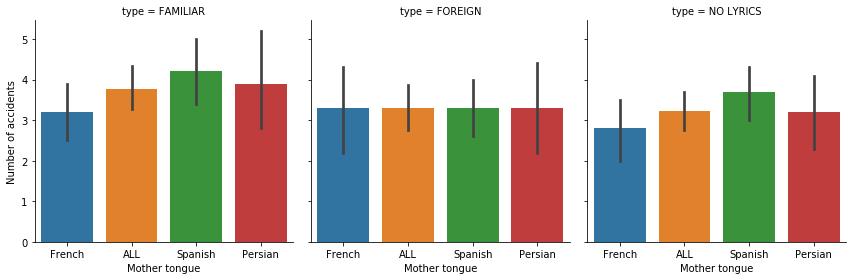

In [80]:
import seaborn as sns
sns.factorplot(
    x      = "Mother tongue",
    y      = "Number of accidents",
    col = "type",
    data   = df,
    kind   = "bar",

)
plt.show()

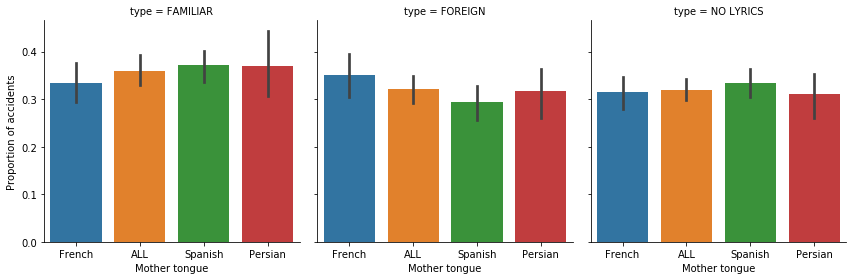

In [81]:
import seaborn as sns
sns.factorplot(
    x      = "Mother tongue",
    y      = "Proportion of accidents",
    col = "type",
    data   = df,
    kind   = "bar",

)
plt.show()

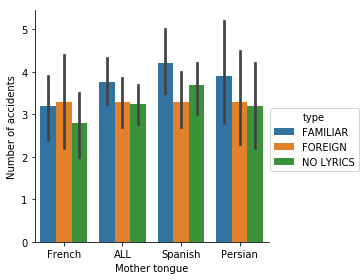

In [82]:
import seaborn as sns
sns.factorplot(
    x      = "Mother tongue",
    y      = "Number of accidents",
    hue = "type",
    data   = df,
    kind   = "bar",

)
plt.show()

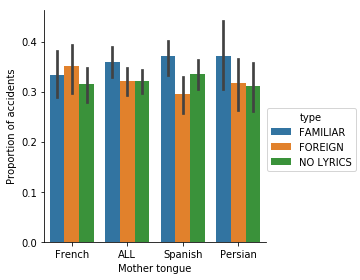

In [83]:
import seaborn as sns
sns.factorplot(
    x      = "Mother tongue",
    y      = "Proportion of accidents",
    hue = "type",
    data   = df,
    kind   = "bar",

)
plt.show()

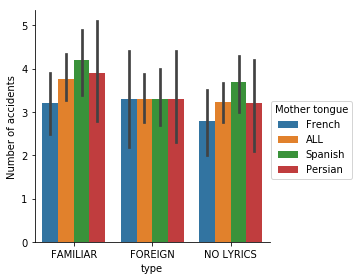

In [84]:
import seaborn as sns
sns.factorplot(
    x      = "type",
    y      = "Number of accidents",
    hue = "Mother tongue",
    data   = df,
    kind   = "bar",
)
plt.show()

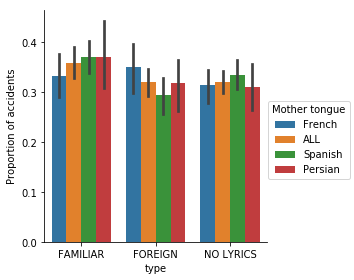

In [85]:
import seaborn as sns
sns.factorplot(
    x      = "type",
    y      = "Proportion of accidents",
    hue = "Mother tongue",
    data   = df,
    kind   = "bar",
)
plt.show()

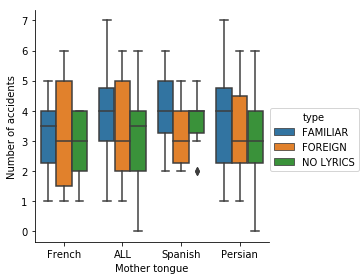

In [86]:
import seaborn as sns
sns.factorplot(
    x      = "Mother tongue",
    y      = "Number of accidents",
    hue = "type",
    data   = df,
    kind   = "box",
)
plt.show()

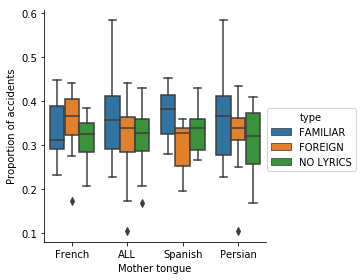

In [88]:
import seaborn as sns
sns.factorplot(
    x      = "Mother tongue",
    y      = "Proportion of accidents",
    hue = "type",
    data   = df,
    kind   = "box",
)
plt.show()